# Python for Modules M4 and M5 of AT and TN

This notebook contains functions with their applications that are useful for Modules M4 and M5 in the programmes of Advanced Technology and Applied Physics. 

In Modlule 4 in the program AT and TN, along Matlab and Mathematica also Python is used as a tool to represent models by transfer functions, state-space models, and have tools to calculate their characteristics.

Matlab | Python | Mathematica
-------|--------|------------
Use Matlab environment | use various environments | use of Mathematica notebooks
All functions integrated | load specific libraries | All functions integrated
-- |  numpy, scipy, scipy.signal, matplotlib | --
Make own functions | Make own objects | diverse


## Items to address

* Model definitions:
    * Transfer functions
    * State-Space model
    * Zero-Pole-Gain model
* Representation:
    * Bode plot
    * Nyquist plot
* Outpus response:
    * Step function reponse
    * Impulse function response
    * Harmonic response
    * Predefined function response

#### First import the nesescary libraries

In [21]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

#### Make a first transfer function system and calculate the frequency response and present this in a Bode-plot.

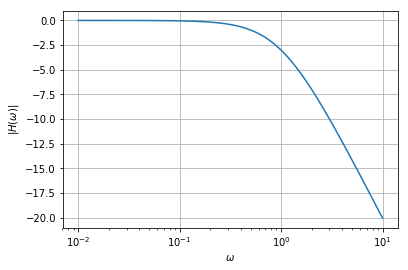

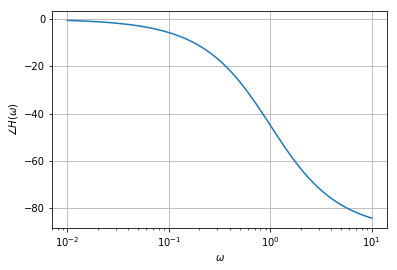

In [22]:
sys = signal.TransferFunction([1], [1, 1])
w, mag, phase = sys.bode()

plt.figure()
plt.semilogx(w, mag)    # Bode magnitude plot
plt.grid(True)
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.figure()
plt.semilogx(w, phase)  # Bode phase plot
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.grid(True)
plt.show()

In [23]:
a = np.array([[-1.0, 5.0], [-1.0, -2.0]])
b = np.array([[0.0], [1.0]])
c = np.array([[1.0, 1.0]])
d = np.array([[0.0]])

System 2 in State-Space is:  StateSpaceContinuous(
array([[-1.,  5.],
       [-1., -2.]]),
array([[0.],
       [1.]]),
array([[1., 1.]]),
array([[0.]]),
dt: None
)
System 2 in transfer function is:  TransferFunctionContinuous(
array([1., 6.]),
array([1., 3., 7.]),
dt: None
)


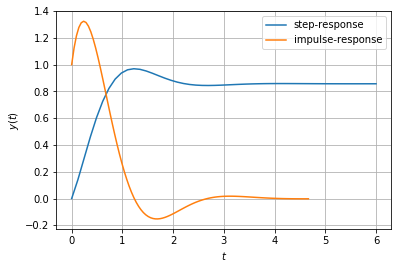

In [24]:
sys2 = signal.StateSpace(a, b, c, d)
print("System 2 in State-Space is: ",sys2)
systf2=signal.StateSpace.to_tf(sys2)
print("System 2 in transfer function is: ",systf2)

t2 = np.linspace(0, 6)
u2 = np.ones_like(t2)
tout2, y2, x2 = signal.lsim(systf2, u2, t2)
plt.plot(t2, y2,label='step-response')
plt.grid(True)
tout2b, y2b = signal.impulse(systf2)
plt.plot(tout2b,y2b,label='impulse-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

System 3 in zero-pole-gain is:  ZerosPolesGainContinuous(
array([-1., -3.]),
array([-1.-2.j, -1.+2.j]),
5,
dt: None
)
System 3 in transfer function is:  TransferFunctionContinuous(
array([ 5., 20., 15.]),
array([1., 2., 5.]),
dt: None
)


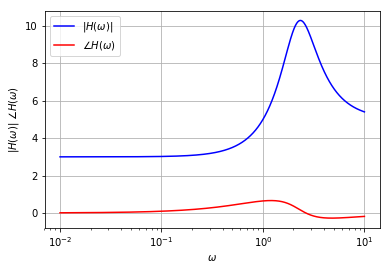

In [25]:
sys3=signal.ZerosPolesGain([-1., -3.], [-1.-2j, -1+2j], 5)
print("System 3 in zero-pole-gain is: ",sys3)
systf3=signal.ZerosPolesGain.to_tf(sys3)
print("System 3 in transfer function is: ",systf3)
w3, H3 = signal.freqresp(sys3)

plt.figure()
plt.semilogx(w3,np.abs(H3),"b",label=r'$|H(\omega)|$')
plt.semilogx(w3,np.angle(H3),"r",label=r'$\angle H(\omega)$')
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)| \; \angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

## Step repsonse of a state-space system

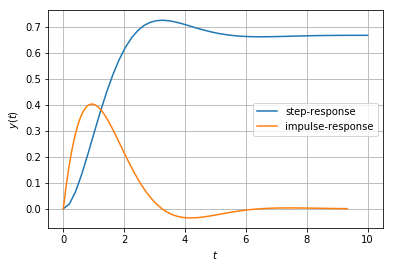

In [26]:
sys4 = signal.lti([[-1., 1.], [-1., -0.5]], [[0.], [1.]], [[1., 0.]], 0.)
t = np.linspace(0, 10)
u = np.ones_like(t)
tout, y, x = signal.lsim(sys4, u, t)
plt.plot(t, y,label='step-response')
plt.grid(True)
tout2, y2 = signal.impulse(sys4)
plt.plot(tout2,y2,label='impulse-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.legend()
plt.grid(True)
plt.show()

### Define a new system

In [27]:
sys5 = signal.ZerosPolesGain([], [-1, -3+1j, -3-1j], [5])
w, H = signal.freqresp(sys5)

plot the response

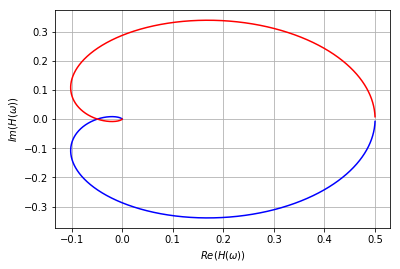

In [28]:
plt.figure()
plt.plot(H.real, H.imag, "b")
plt.plot(H.real, -H.imag, "r")
plt.xlabel (r'$Re(H(\omega))$')
plt.ylabel (r'$Im(H(\omega))$')
plt.grid(True)
plt.show()

combine the magnitude and phase in one graph.

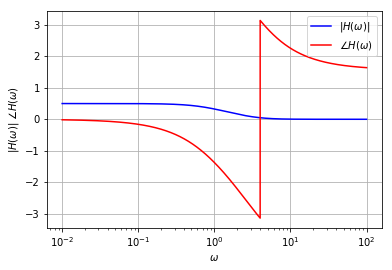

In [29]:
plt.figure()
plt.semilogx(w,np.abs(H),"b",label=r'$|H(\omega)|$')
plt.semilogx(w,np.angle(H),"r",label=r'$\angle H(\omega)$')
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)| \; \angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()